In [9]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
import matplotlib.cm as cm


In [10]:
result=qload('output 201')

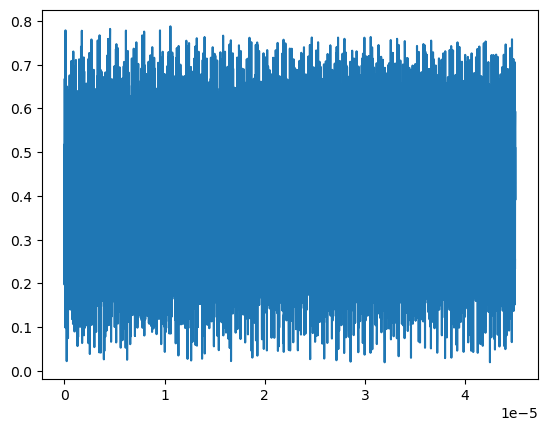

In [11]:
N=20
ec=1.6e-19
h=(6.62e-34)/2*np.pi
c=3e8
#w_a=c/780e-9
w_a=50e9
g=2*(np.pi)*7.8e6
kappa=2*(np.pi)*2.5e6
gamma=2*(np.pi)*3e6
alpha=1.4
#tlist = np.linspace(0, 45e-6, 450)
#tlist=round(tlist,8)
t_p=25e-6

tlist=[]

t=0.0
while t<=45:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-6)
    tlist.append(float("%.8f"%o))
    t=t+0.001
tlist=np.array(tlist)

No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
phi_expected=No*(coherent(N,alpha)-coherent(N,-alpha))
rho1=ket2dm(phi_expected)
fida=result.states
#print(fida)
fida1=[]
for i in range(0,len(tlist)):
    g=ptrace(fida[i],0)

    fidelity1=fidelity(rho1,g)
    fida1.append(fidelity1)

fig=plt.figure()
ax=fig.add_subplot(111)
line=ax.plot(tlist,fida1)
plt.show()


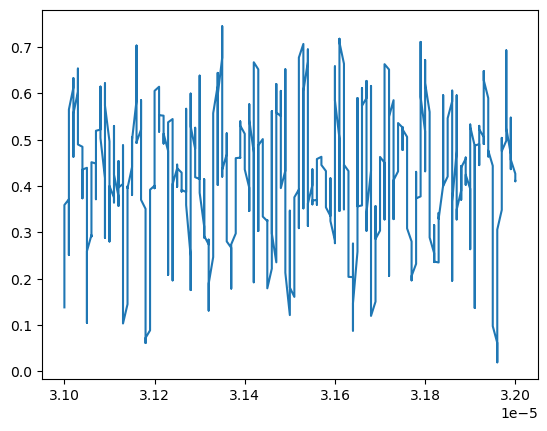

[112, 113, 1739, 1740, 2704, 3325, 3326, 3514, 3515, 4367, 4555, 4556, 6141, 6142, 7183, 7769, 7958, 9543, 9544, 10584, 10585, 10586, 12171, 13212, 13987, 15839, 15840, 16614, 18466, 18467, 18656, 19241, 21868, 21869, 24685, 25318, 27312, 27945, 29939, 30572, 32566, 33199, 33974, 36601, 39228, 39229, 42045, 44672]
[[1.12000000e+02 7.74288374e-01]
 [1.13000000e+02 7.78098754e-01]
 [1.73900000e+03 7.63703029e-01]
 [1.74000000e+03 7.77060357e-01]
 [2.70400000e+03 7.57285827e-01]
 [3.32500000e+03 7.54954030e-01]
 [3.32600000e+03 7.52847993e-01]
 [3.51400000e+03 7.60222545e-01]
 [3.51500000e+03 7.66816394e-01]
 [4.36700000e+03 7.58428936e-01]
 [4.55500000e+03 7.52910786e-01]
 [4.55600000e+03 7.81422879e-01]
 [6.14100000e+03 7.64605647e-01]
 [6.14200000e+03 7.77607194e-01]
 [7.18300000e+03 7.50836146e-01]
 [7.76900000e+03 7.66636766e-01]
 [7.95800000e+03 7.75287382e-01]
 [9.54300000e+03 7.53532115e-01]
 [9.54400000e+03 7.78039874e-01]
 [1.05840000e+04 7.53072046e-01]
 [1.05850000e+04 7.87357

In [12]:
f=[]
t=[]
for i in range(31000,32000):
    f.append(fida1[i])
    t.append(tlist[i])

fig=plt.figure()
ax=fig.add_subplot(111)
line=ax.plot(t,f)
plt.show()

fida1=np.array(fida1)
fifa=fida1[fida1>0.75]
I=[]
for i in  range(0,len(fida1)):
    if fida1[i]>0.75:
        I.append(i)
print(I)
I=np.array(I)
fifa=np.array(fifa)

H=[[],[]]
for i in range(0,len(I)):
    H[0].append(I[i])
    H[1].append(fifa[i])
print((np.array(H)).T)


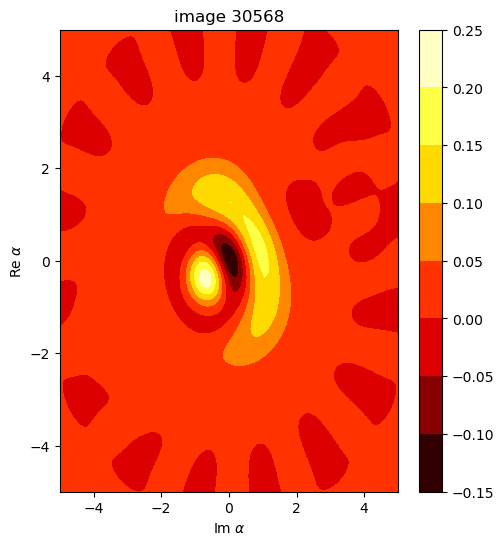

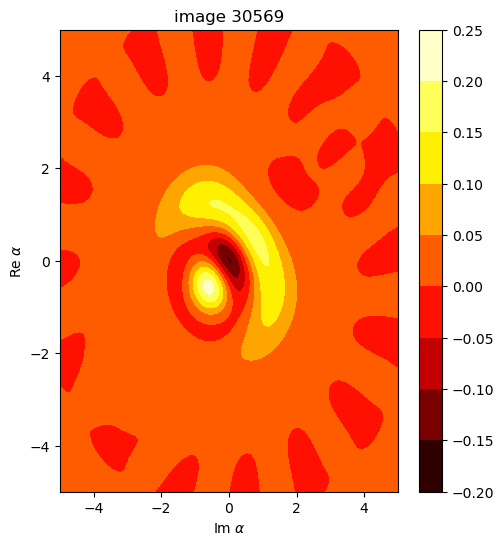

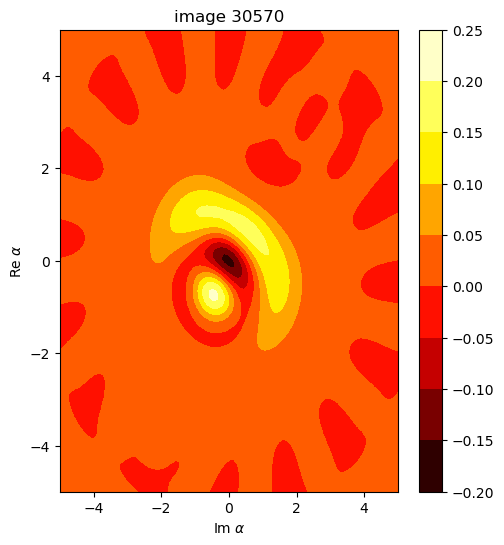

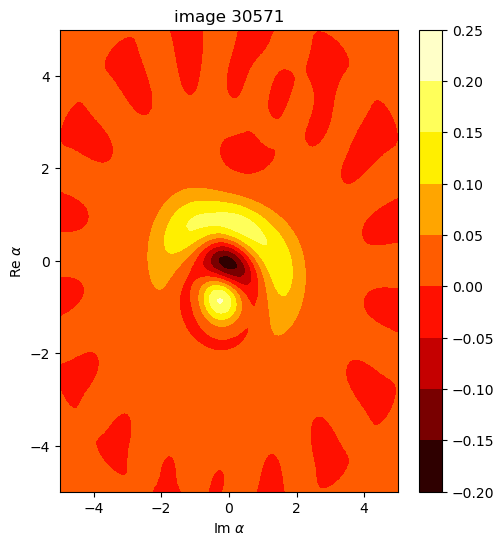

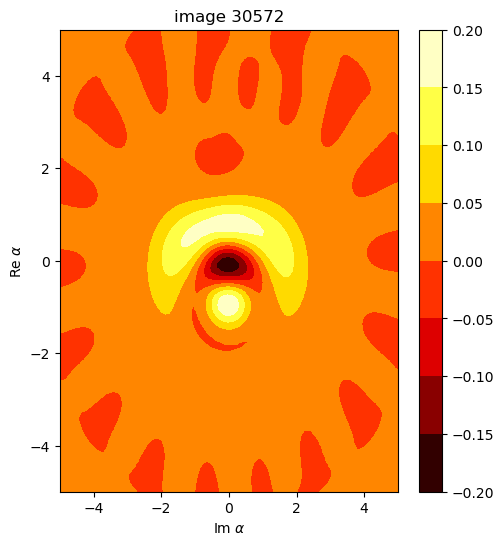

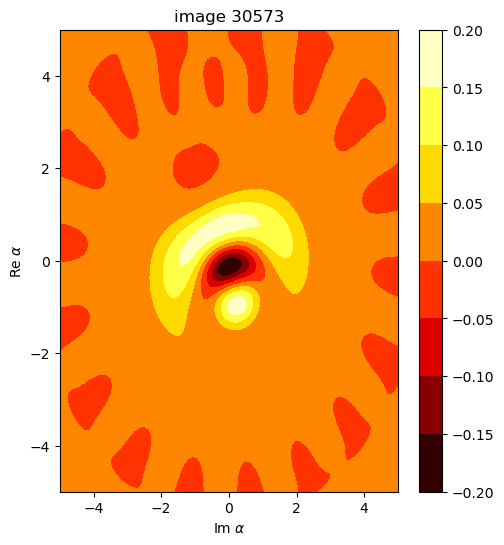

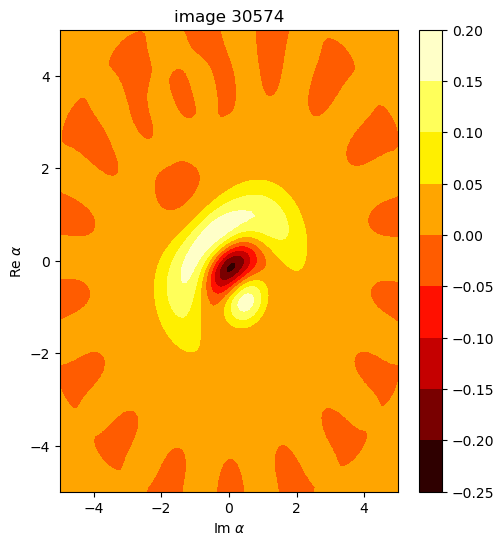

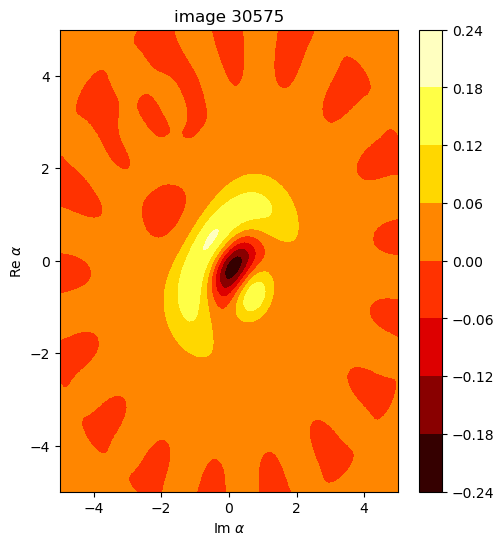

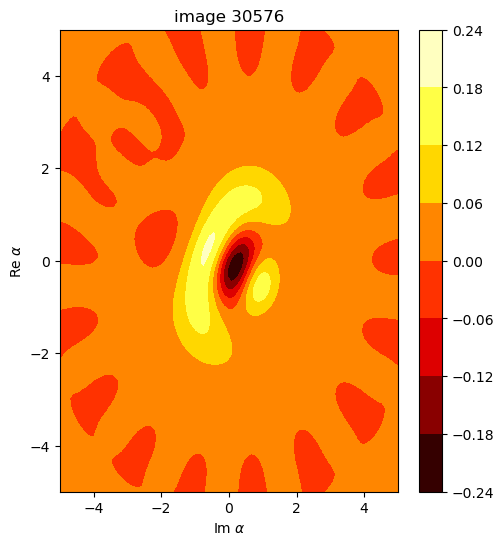

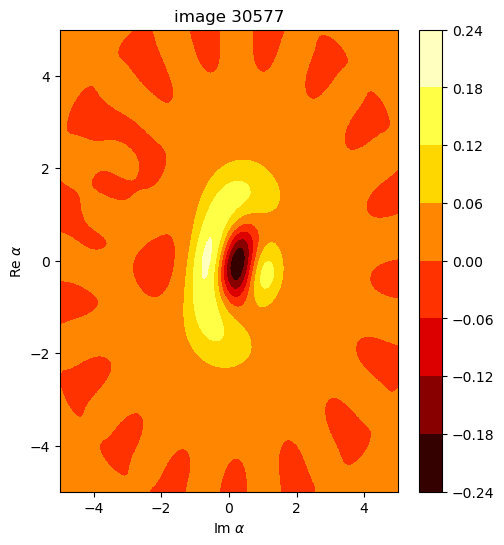

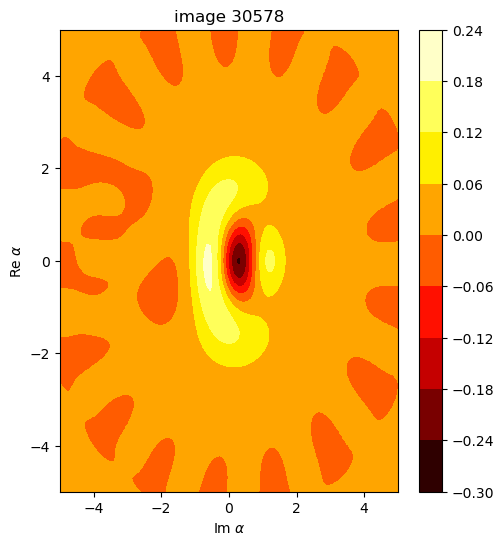

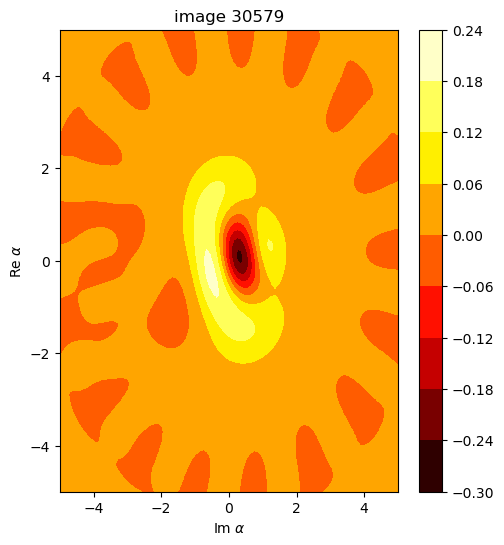

In [14]:
def wigner_plot_steadystate(rho,xvec,i):
    
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,6))
    axes1=fig.add_subplot(1,2,1)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    plt.title(f"image {i}")
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    
    #axes2=fig.add_subplot(1,2,2)
    #plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    #axes2.set_xlabel('Fock number') 
    #axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)

#3.19560000e+04
for i in range(30568,30580,1):
    
    wigner_plot_steadystate(result.states[i],xvec,i)
#31950,31960
# 19343,19344

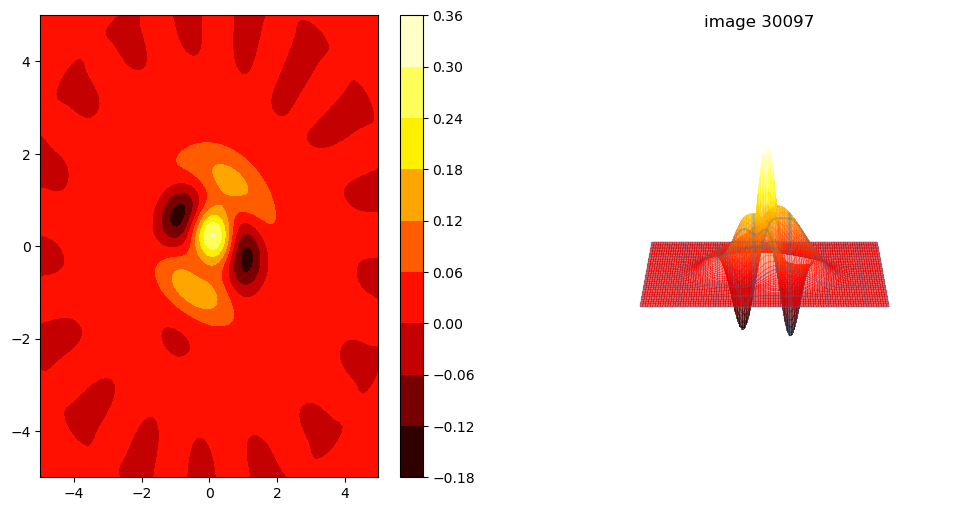

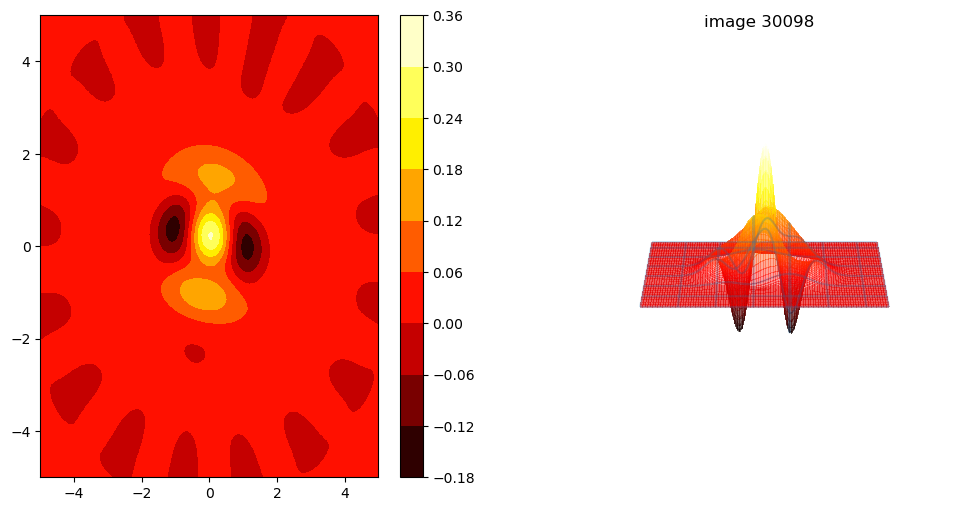

In [ ]:
def wigner_plot_steadystate(rho,xvec,i):
    
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,6),facecolor='none')
    axes1=fig.add_subplot(121)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    xvec=np.linspace(-2,2,100)
    X,Y=np.meshgrid(xvec,xvec)
    axes1=fig.add_subplot(122,projection='3d')
    
    dia=axes1.plot_surface(X,Y,W,rstride=1,cstride=1,antialiased=False,cmap='hot',alpha=0.40)
    dia=axes1.plot_wireframe(X,Y,W,rstride=15,cstride=15,antialiased=True,cmap='hot',alpha=.25)
    
    axes1.view_init(15,270)
    plt.title(f"image {i}")
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    axes1.axis('off')
    
    #axes2=fig.add_subplot(1,2,2)
    #plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    #axes2.set_xlabel('Fock number')
    #axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)
X,Y=np.meshgrid(xvec,xvec)

for i in range(30097,30099,1):
    
    wigner_plot_steadystate(result.states[i],xvec,i)

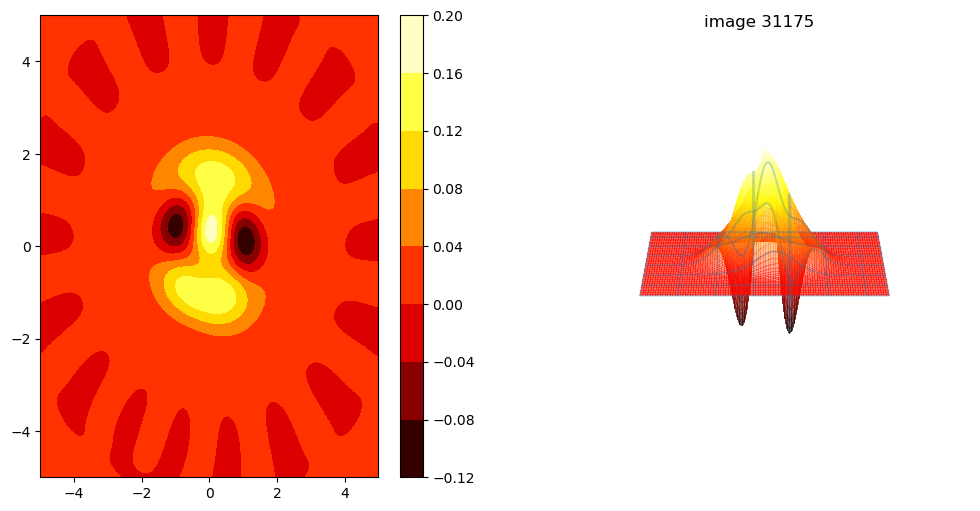

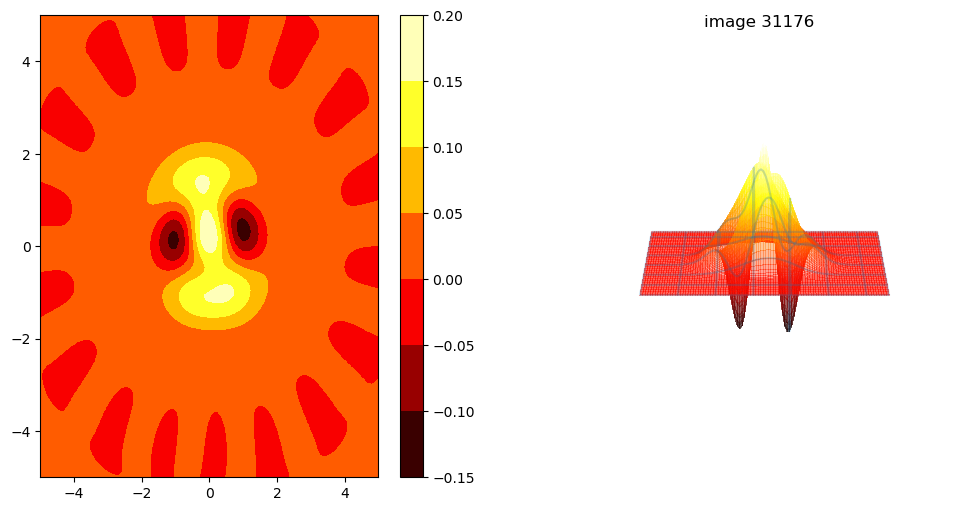

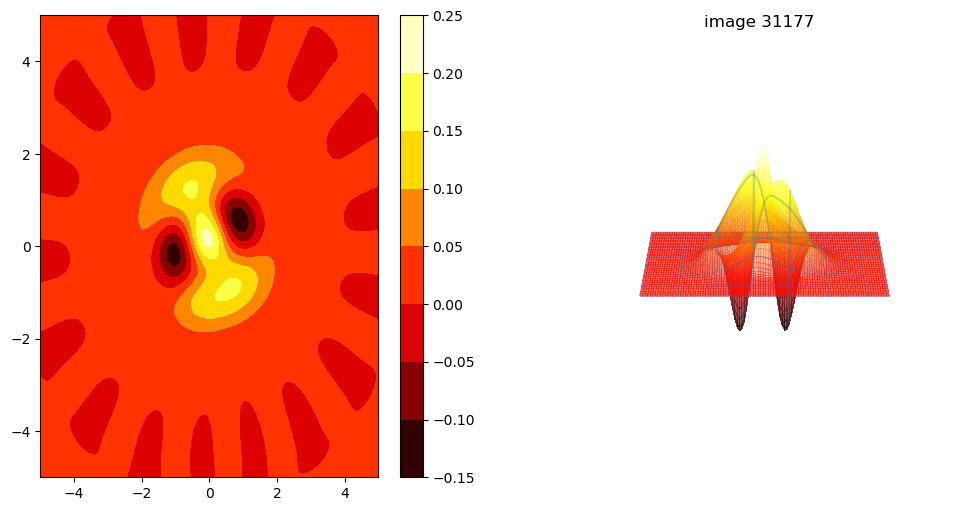

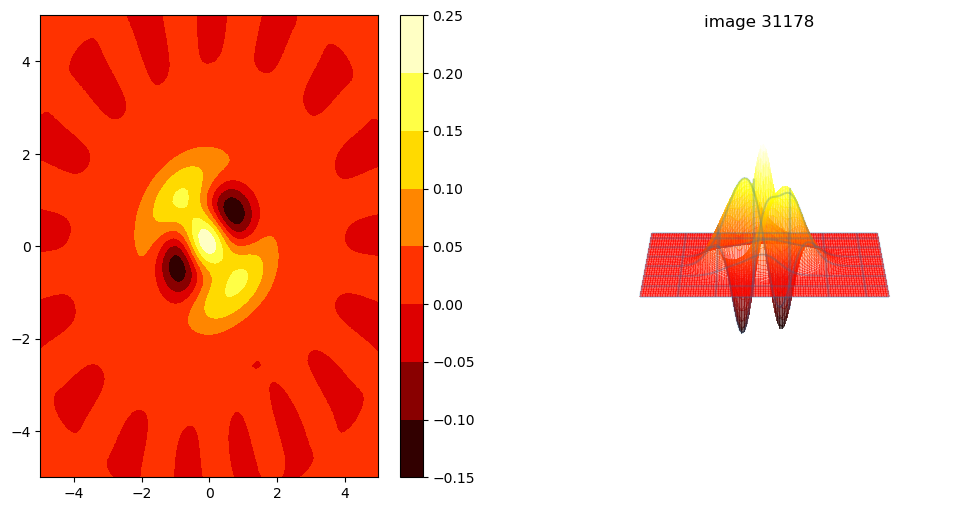

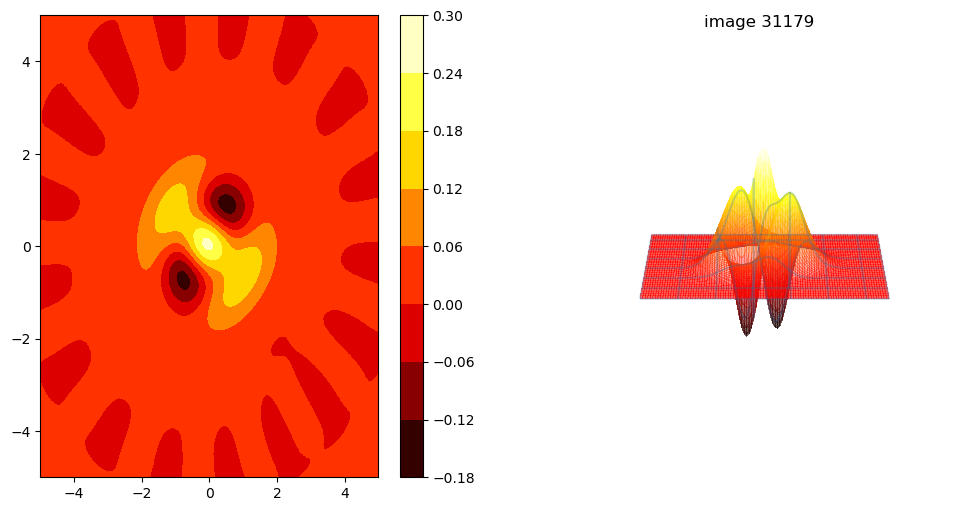

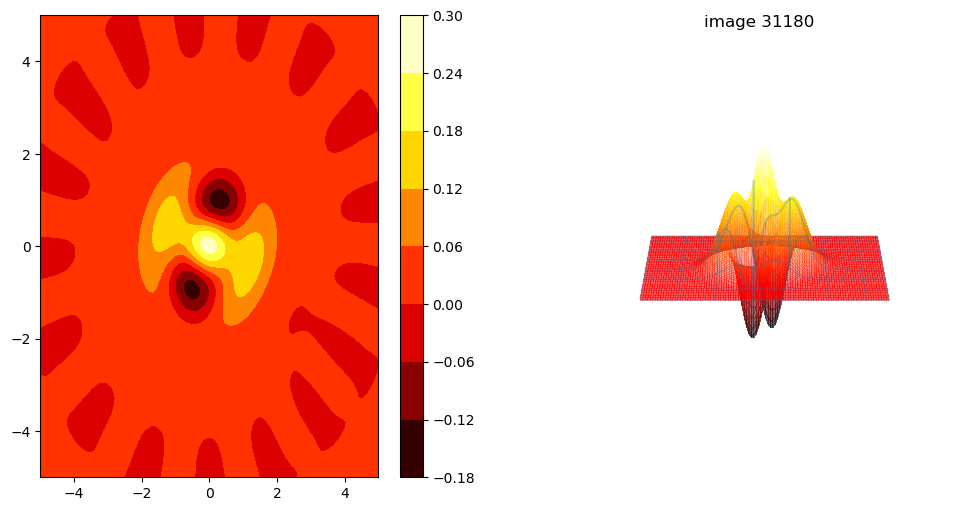

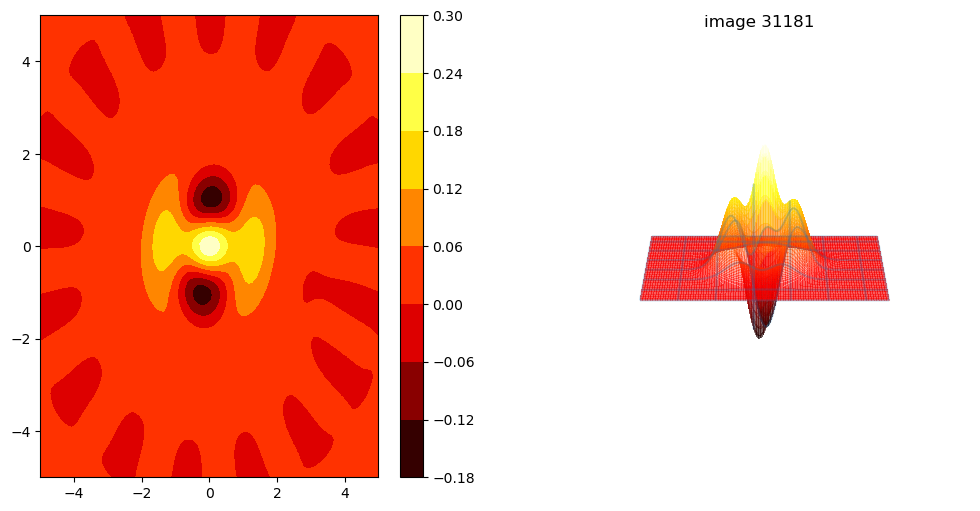

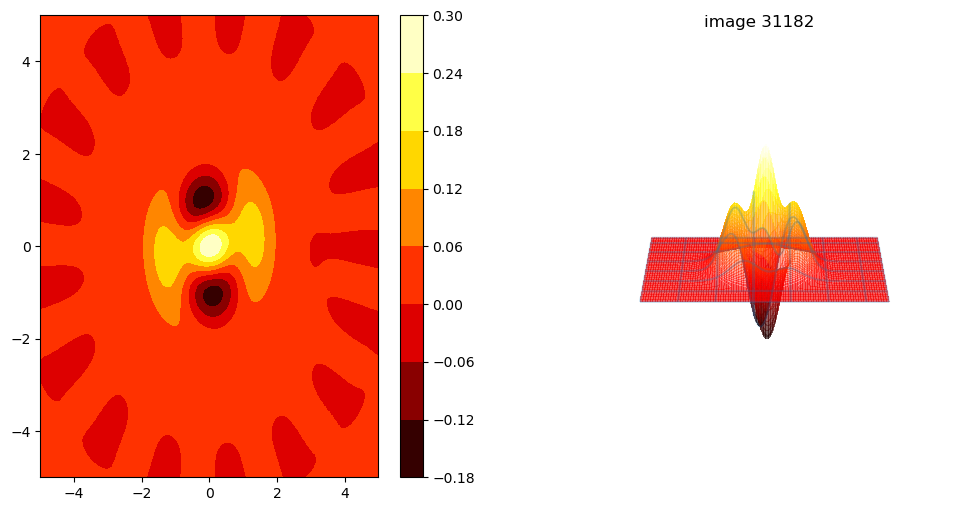

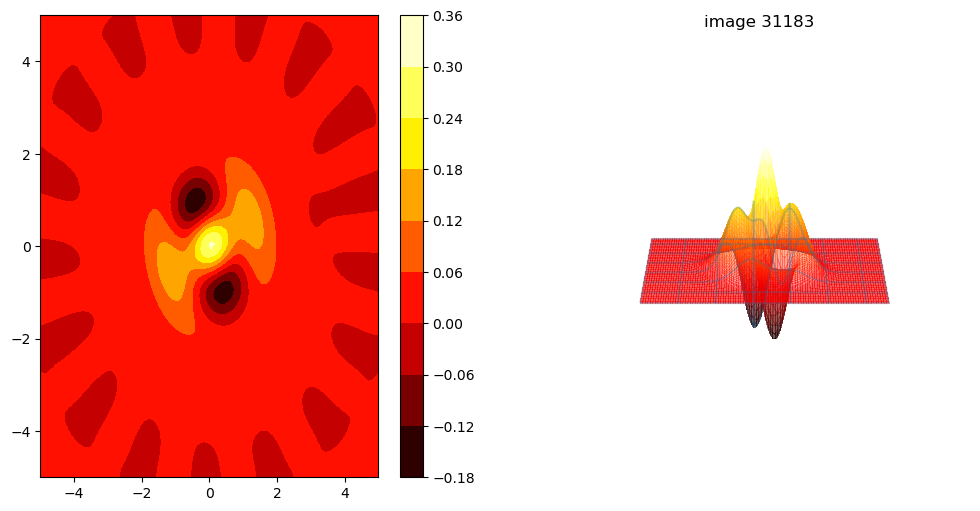

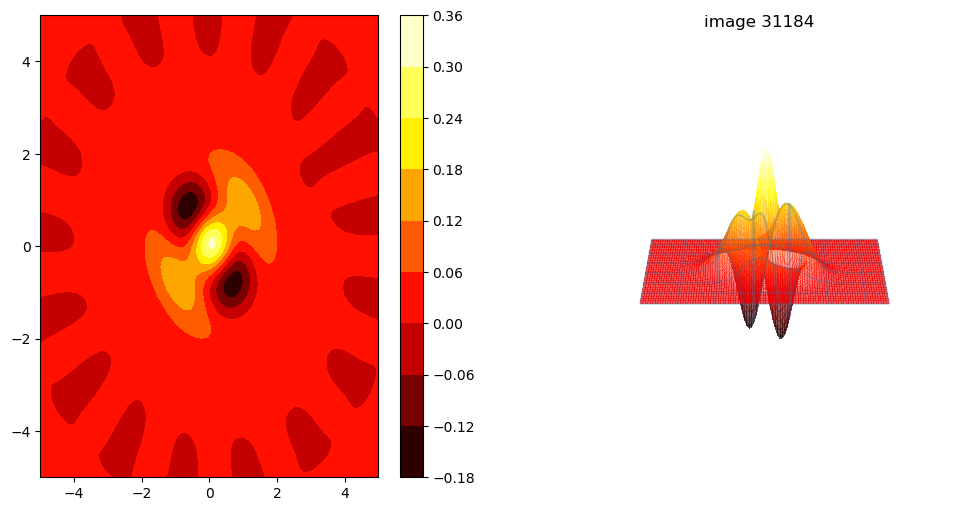

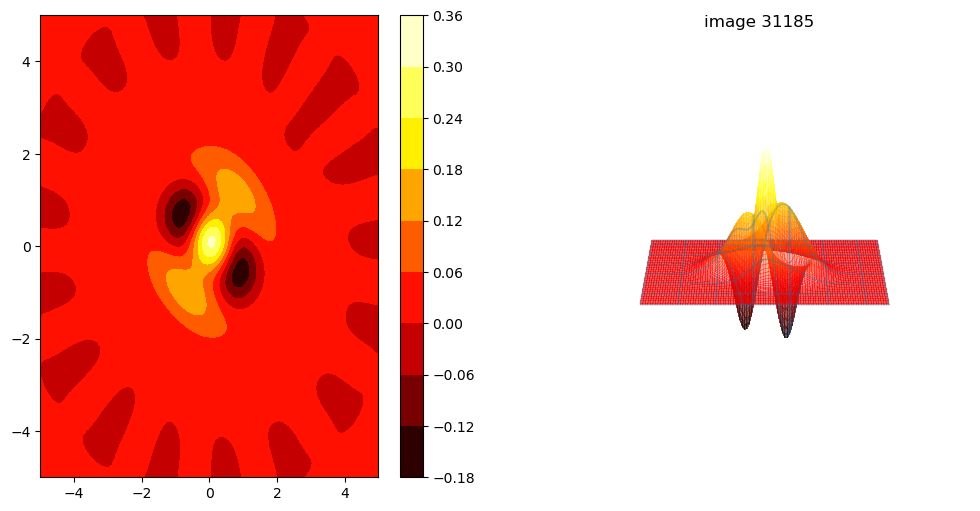

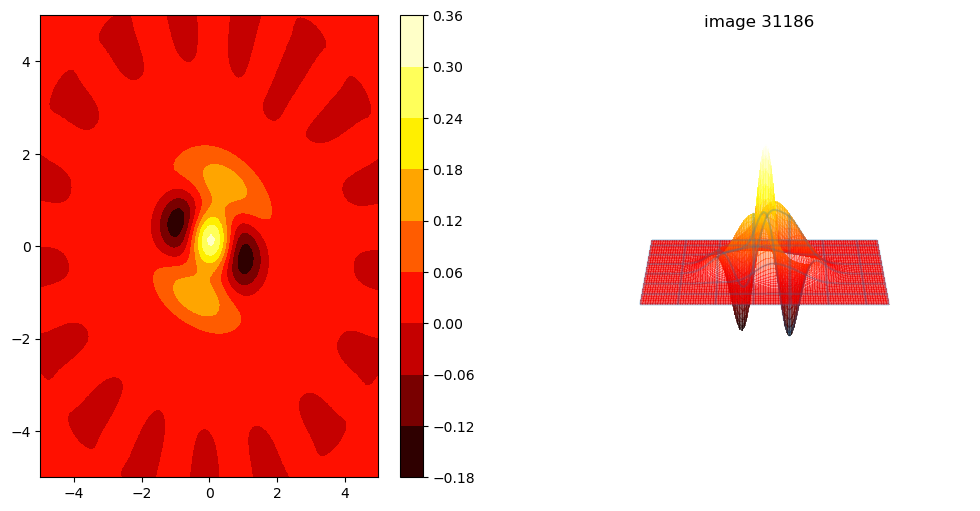

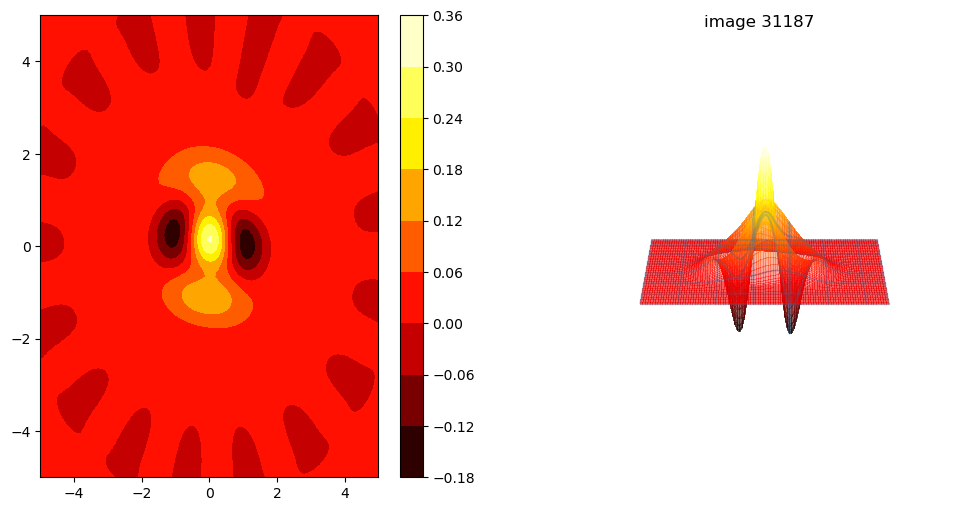

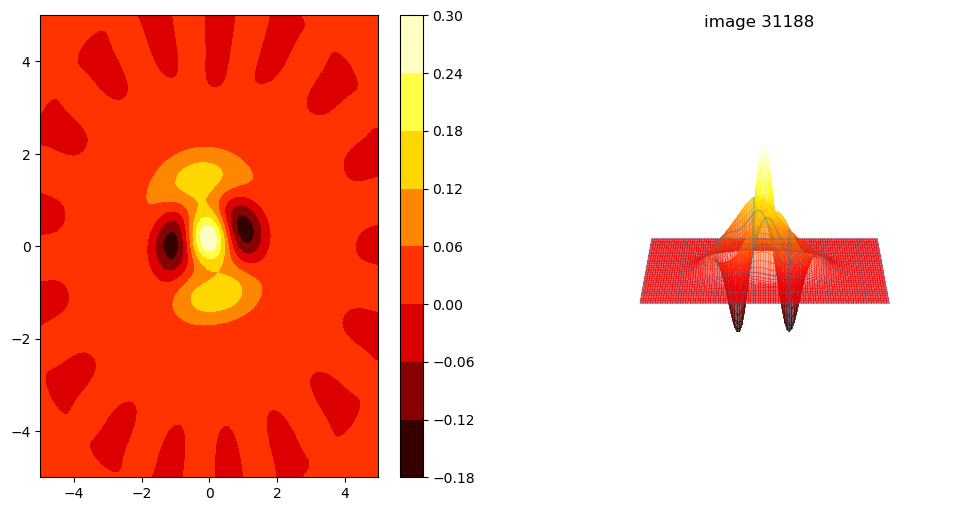

In [ ]:
def wigner_plot_steadystate(rho,xvec,i):
    
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,6),facecolor='none')
    axes1=fig.add_subplot(121)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    xvec=np.linspace(-2,2,100)
    X,Y=np.meshgrid(xvec,xvec)
    axes1=fig.add_subplot(122,projection='3d')
    
    dia=axes1.plot_surface(X,Y,W,rstride=1,cstride=1,antialiased=False,cmap='hot',alpha=0.40)
    dia=axes1.plot_wireframe(X,Y,W,rstride=15,cstride=15,antialiased=True,cmap='hot',alpha=.25)
    
    axes1.view_init(15,270)
    plt.title(f"image {i}")
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    axes1.axis('off')
    
    #axes2=fig.add_subplot(1,2,2)
    #plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    #axes2.set_xlabel('Fock number')
    #axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)
X,Y=np.meshgrid(xvec,xvec)

for i in range(31175,31189,1):
    
    wigner_plot_steadystate(result.states[i],xvec,i)